## Introduction:
The current data set includes details of the 500 people who have opted for loan. Also, the data mentions whether the person has paid back the loan or not and if paid, in how many days they have paid. In this project, we will try to draw few insights on sample Loan data. 

data source: kaggle.


## Loading the initial libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loadinng dataset:

In [3]:
loan_df=pd.read_csv('Loan_data.csv')

In [5]:
loan_df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [8]:
loan_df.duplicated().sum() #lets see there is any duplicate value or not?

0

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [10]:
loan_df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


## check null values

In [13]:
loan_df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

paid_off_time and past_due_days has null values, need to remove values

In [15]:
loan_df['past_due_days'] = loan_df['past_due_days'].fillna(0)

#Filling the empty values in 'paid_off_time' as '-1'

loan_df['paid_off_time'] = loan_df['paid_off_time'].fillna(-1)

In [18]:
loan_df.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

## spelling check

In [20]:
loan_df['education']= loan_df['education'].replace('Bechalor','Bachelor')

In [27]:
loan_df.shape
loan_df.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

need to convert some object datypes into datetime (ex:effective_date , due_date) 

In [28]:
#Coverting the following columns to 'datetime'
loan_df['effective_date'] = pd.to_datetime(loan_df['effective_date'])
loan_df['due_date'] = pd.to_datetime(loan_df['due_date'])
loan_df['paid_off_time'] = pd.to_datetime(loan_df['paid_off_time']).dt.date
loan_df['paid_off_time'] = pd.to_datetime(loan_df['paid_off_time'])
loan_df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0.0,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,0.0,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,0.0,28,college,female


## Exploratory Data Analysis - 

In [29]:
a = loan_df['loan_status'].value_counts()
pd.DataFrame(a)

,loan_status
PAIDOFF,300
COLLECTION,100
COLLECTION_PAIDOFF,100


## Observation:

outoff 500 there is 300 people repaid full amount, 100 people not repaid the loan and 100 people paid but lately after due date.

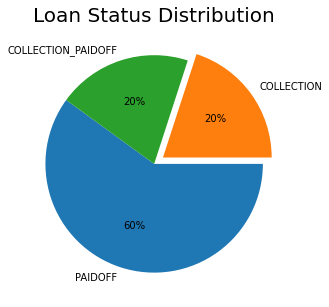

In [31]:
plt.figure(figsize = [10,5])
plt.pie(loan_df['loan_status'].value_counts(),labels=loan_df['loan_status'].unique(),explode=[0,0.1,0],startangle=144,autopct='%1.f%%')
plt.title('Loan Status Distribution',fontsize = 20)
plt.show()

## Gender analysis

In [33]:
b= loan_df['Gender'].value_counts()
pd.DataFrame(b)

,Gender
male,423
female,77


outoff 500 there are 423 male and 77 females present 

In [36]:
c = loan_df.groupby(['Gender'])['loan_status'].value_counts()
pd.DataFrame(c)

loan_status
Gender loan_status                    
female PAIDOFF                      53
       COLLECTION_PAIDOFF           14
       COLLECTION                   10
male   PAIDOFF                     247
       COLLECTION                   90
       COLLECTION_PAIDOFF           86

C:\Users\Neehal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


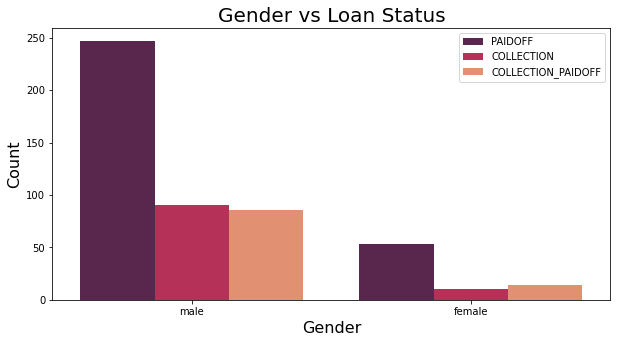

In [37]:
plt.figure(figsize = [10,5])
sns.countplot(loan_df['Gender'],hue=loan_df['loan_status'],palette='rocket')
plt.legend(loc='upper right')
plt.title('Gender vs Loan Status',fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

## Observations:

Around 40% of male population have repaid their loan lately (or yet to pay)

Around 30% of female population have repaid their loan lately (or yet to pay)

## Education Analysis :

In [43]:
d = loan_df['education'].value_counts()
pd.DataFrame(d)

,education
college,220
High School or Below,209
Bachelor,67
Master or Above,4


C:\Users\Neehal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


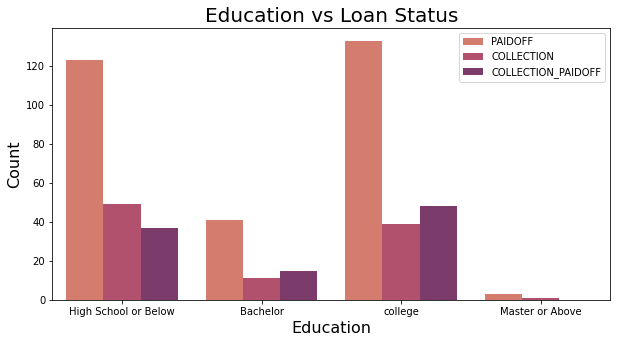

In [41]:
plt.figure(figsize = [10,5])
sns.countplot(loan_df['education'],hue=loan_df['loan_status'],palette='flare')
plt.legend(loc='upper right')
plt.title('Education vs Loan Status',fontsize=20)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

# Observations:

Majority of the loan takers are from High School or College background

Very few people from Masters or above background took loan.

## Term Analysis:

C:\Users\Neehal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


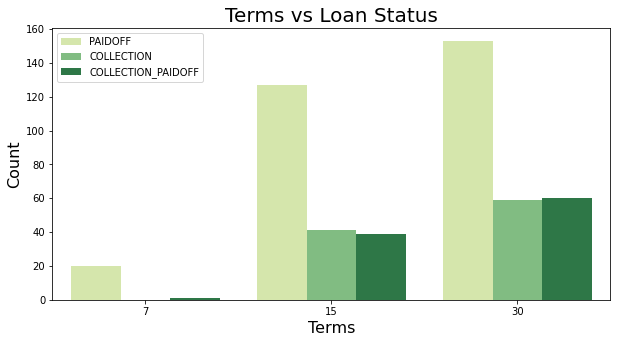

In [45]:
plt.figure(figsize = [10,5])
sns.countplot(loan_df['terms'],hue=loan_df['loan_status'],palette='YlGn')
plt.legend(loc='upper left')
plt.title('Terms vs Loan Status',fontsize=20)
plt.xlabel('Terms', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

# Observations:

Only few people have opted loan for 7 days term

Majority of the late payments are from people who have their loan terms as 15 days and 30 days

# Loan Effective Date Analysis

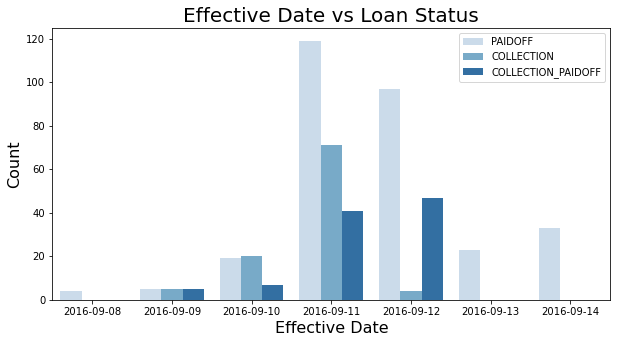

In [59]:
plt.figure(figsize = [10,5])
dates = loan_df['effective_date'].dt.date
sns.countplot(x=dates, hue=loan_df['loan_status'],palette='Blues')
plt.legend(loc='upper right')
plt.title('Effective Date vs Loan Status',fontsize=20)
plt.xlabel('Effective Date', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

## Observations:

On 11th and 12th September, loan was given to many people maybe as part of a drive.

## Let see Data Distribution:

array([[<AxesSubplot:title={'center':'Principal'}>,
        <AxesSubplot:title={'center':'terms'}>,
        <AxesSubplot:title={'center':'effective_date'}>],
       [<AxesSubplot:title={'center':'due_date'}>,
        <AxesSubplot:title={'center':'paid_off_time'}>,
        <AxesSubplot:title={'center':'past_due_days'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

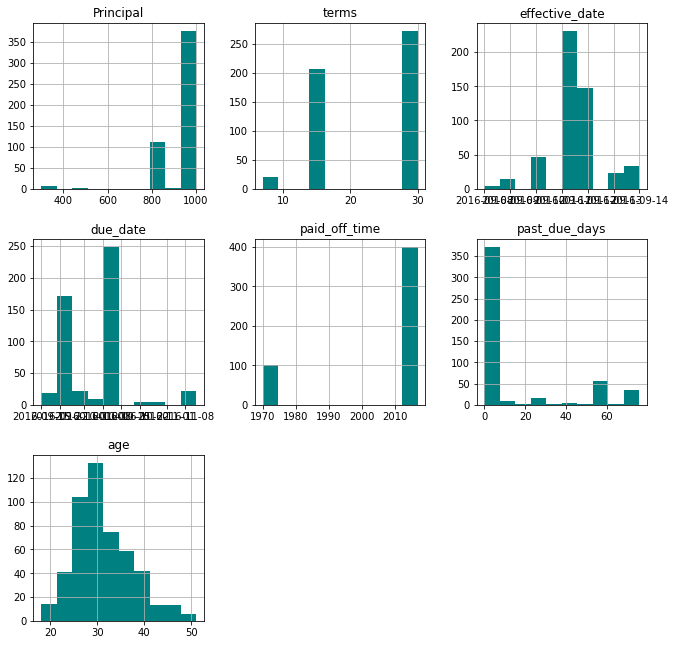

In [46]:
loan_df.hist(figsize = (11,11), color="#008080")

## correlation:

[Text(0.5, 0, 'Principal'),
 Text(1.5, 0, 'terms'),
 Text(2.5, 0, 'past_due_days'),
 Text(3.5, 0, 'age')]

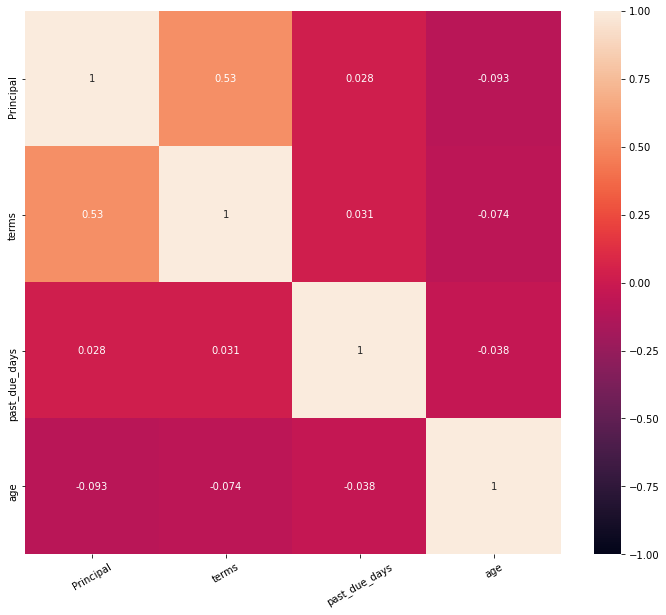

In [56]:
correlation = loan_df[loan_df.columns].corr()
plt.figure(figsize=(12, 10))
plot = sns.heatmap(correlation, vmin = -1, vmax = 1,annot=True, annot_kws={"size": 10})
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

# Conclusion:
1) 20% of the people have not repaid the loan 20% of the people have repaid the loan but lately after due date and 60% of the people have repaid the loan on time

2) Majority of the loan takers are from High School or College background.

3) Majority of the people who took loan have age ranging from 24 years to 38 years.

4) Majority of the people have opted for Principal of  800and 1000

5) Majority of the late payments are from people who have their loan terms as 15 days and 30 days.

6) Most of the Elder people (35 - 50 years) have paid back loan on time.